In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression   

import statsmodels.formula.api as smf               

import pandas_profiling

In [181]:
#import the data
train = pd.read_csv('train.csv')
feature = pd.read_csv('features.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')

In [182]:
train = train.merge(stores, how='left').merge(feature, how='left')
train.head(2)
#train.to_excel('train.xlsx')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [183]:
test = test.merge(stores, how='left').merge(feature, how='left')
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573


In [184]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None


In [185]:
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB
None


In [186]:
profile_report = pandas_profiling.ProfileReport(train)

In [187]:
profile_report.to_file('profile_report_train.html')

In [188]:
profile_report = pandas_profiling.ProfileReport(test)

In [189]:
profile_report.to_file('profile_report_test.html')

In [190]:
#some data types need data type conversions  - No need
#Renaming columns is required  -No need
# missings are existed-Yes
#Need to derive some columns - No need
#Any variables with more zeros (why?)
#Any variables with highly correlated - done
#any variables with low variation-done
#any variables with outliers-done
#any special characters in the data - no-need
#list of categorical variable required to convert into numeric (encoding)-done

In [191]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_train = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_train = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object','O']]

#Print the data frame
print( numeric_var_train)
print(cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [192]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_test = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_test = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object','O']]

#Print the data frame
print( numeric_var_test)
print(cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [193]:
#Convert numeric-variable in to the train_num
train_num=train[numeric_var_train]
train_num.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,46039.49,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,41595.55,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,19403.54,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,21827.90,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [194]:
#Convert catagorical-variable in to the train_cat
train_cat=train[cat_var_train]
train_cat.head(5)

,Date,Type
0,2010-02-05,A
1,2010-02-12,A
2,2010-02-19,A
3,2010-02-26,A
4,2010-03-05,A


In [195]:
#Convert numeric-variable in to the test_num
test_num=test[numeric_var_test]
test_num.head(5)

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [196]:
#Convert catagorical-variable in to the test_cat
test_cat=test[cat_var_test]
test_cat.head(5)

,Date,Type
0,2012-11-02,A
1,2012-11-09,A
2,2012-11-16,A
3,2012-11-23,A
4,2012-11-30,A


In [197]:
# Use a general function that returns multiple values for train
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).round()
num_summary

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
N,421570.0,421570.0,4.215700e+05,4.215700e+05,421570.0,421570.0,1.506810e+05,111248.0,137091.0,134967.0,151432.0,421570.0,421570.0
NMISS,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2.708890e+05,310322.0,284479.0,286603.0,270138.0,0.0,0.0
SUM,9359084.0,18658822.0,6.737219e+09,5.764039e+10,25332166.0,1416908.0,1.091898e+09,370970765.0,197331717.0,456616070.0,700974954.0,72173605.0,3355819.0
MEAN,22.0,44.0,1.598100e+04,1.367280e+05,60.0,3.0,7.246000e+03,3335.0,1439.0,3383.0,4629.0,171.0,8.0
MEDIAN,22.0,37.0,7.612000e+03,1.401670e+05,62.0,3.0,5.347000e+03,192.0,25.0,1481.0,3359.0,182.0,8.0
STD,13.0,30.0,2.271100e+04,6.098100e+04,18.0,0.0,8.291000e+03,9475.0,9623.0,6292.0,5963.0,39.0,2.0
VAR,163.0,930.0,5.157979e+08,3.718632e+09,340.0,0.0,6.874435e+07,89782396.0,92603636.0,39594097.0,35556027.0,1533.0,3.0
MIN,1.0,1.0,-4.989000e+03,3.487500e+04,-2.0,2.0,0.000000e+00,-266.0,-29.0,0.0,135.0,126.0,4.0
P1,1.0,1.0,5.000000e+00,3.487500e+04,18.0,3.0,1.800000e+01,-1.0,0.0,4.0,352.0,126.0,4.0
P5,3.0,4.0,6.000000e+01,3.969000e+04,27.0,3.0,1.490000e+02,2.0,1.0,29.0,716.0,126.0,5.0


In [198]:
# Create Data audit Report for categorical variables for train
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2),x.value_counts(),x.unique()], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT','ColumnNames','UniqueValues'])
cat_summary=train_cat.apply(lambda x:cat_summary(x))
cat_summary

,Date,Type
N,421570,421570
NMISS,0,0
MODE,2011-12-23,A
FREQ,3027,215478
PERCENT,0.72,51.11
ColumnNames,2011-12-23 3027 2011-11-25 3021 2011-12-...,A 215478 B 163495 C 42597 Name: Type...
UniqueValues,"[2010-02-05, 2010-02-12, 2010-02-19, 2010-02-2...","[A, B, C]"


In [199]:
# Use a general function that returns multiple values for test
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary_test=test_num.apply(lambda x: var_summary(x)).round()
num_summary_test

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
N,115064.0,115064.0,1.150640e+05,115064.0,115064.0,114915.0,86437.0,105235.0,102176.0,115064.0,76902.0,76902.0
NMISS,0.0,0.0,0.000000e+00,0.0,0.0,149.0,28627.0,9829.0,12888.0,0.0,38162.0,38162.0
SUM,2558817.0,5101883.0,1.570597e+10,6206760.0,412107.0,883606307.0,322760229.0,252889036.0,342925040.0,451359388.0,13608681.0,528219.0
MEAN,22.0,44.0,1.364980e+05,54.0,4.0,7689.0,3734.0,2403.0,3356.0,3923.0,177.0,7.0
MEDIAN,22.0,37.0,1.401670e+05,54.0,4.0,4842.0,743.0,78.0,841.0,2390.0,192.0,7.0
STD,13.0,31.0,6.110700e+04,19.0,0.0,10699.0,8323.0,13768.0,7571.0,19445.0,41.0,2.0
VAR,164.0,940.0,3.734056e+09,351.0,0.0,114463481.0,69280569.0,189556153.0,57312494.0,378113888.0,1701.0,3.0
MIN,1.0,1.0,3.487500e+04,-7.0,3.0,-2781.0,-36.0,-179.0,0.0,-185.0,131.0,4.0
P1,1.0,1.0,3.487500e+04,11.0,3.0,21.0,0.0,0.0,3.0,269.0,131.0,4.0
P5,3.0,4.0,3.969000e+04,24.0,3.0,189.0,6.0,1.0,17.0,541.0,131.0,4.0


In [200]:
# Create Data audit Report for categorical variables for test
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2),x.value_counts(),x.unique()], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT','ColumnNames','UniqueValues'])
cat_summary_test=test_cat.apply(lambda x:cat_summary(x))
cat_summary_test

,Date,Type
N,115064,115064
NMISS,0,0
MODE,2012-12-21,A
FREQ,3002,58713
PERCENT,2.61,51.03
ColumnNames,2012-12-21 3002 2012-12-07 2989 2012-12-...,"A 58713 B 44500 C 11851 Name: Type, d..."
UniqueValues,"[2012-11-02, 2012-11-09, 2012-11-16, 2012-11-2...","[A, B, C]"


### By the help of pandas profiling:-

In [201]:
#Dropping Variables >25% missings.
#1.CPI has 38162 (33.2%) missing values
#2.Unemployment has 38162 (33.2%) missing values
#3.MarkDown5 is highly skewed (γ1 = 37.97681524)

In [202]:
train.drop(columns=['CPI','Unemployment','MarkDown5'],inplace=True)
test.drop(columns=['CPI','Unemployment','MarkDown5'],inplace=True)

In [203]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN


In [204]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79


### Outlier Treatment

In [205]:
train['Weekly_Sales'] = np.where(train['Weekly_Sales']>100000,100000,train['Weekly_Sales'])
#We cannot do this on test obviously

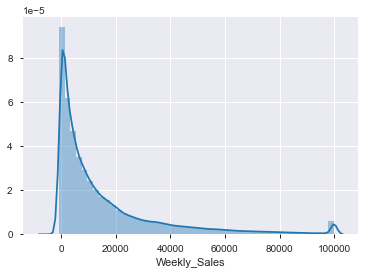

In [206]:
import seaborn as sns
sns.distplot(train.Weekly_Sales)



### Missing value imputations

In [207]:
train=train.fillna(0)
test=test.fillna(0)

In [208]:
print (train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
dtype: int64


In [209]:
print (test.isnull().sum())

Store          0
Dept           0
Date           0
IsHoliday      0
Type           0
Size           0
Temperature    0
Fuel_Price     0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
dtype: int64


In [210]:
train['Date'] = pd.to_datetime(train['Date'])

In [211]:
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 
train['Days'] = train['Date_month']*30+train['Date_day']

In [212]:
test['Date'] = pd.to_datetime(test['Date'])

In [213]:
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day
test['Days'] = test['Date_month']*30+test['Date_day']

In [214]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,2,2010,5,65
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,2,2010,12,72


In [215]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,11,2012,2,332
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,11,2012,9,339


In [216]:
train.shape,test.shape

((421570, 17), (115064, 16))

In [217]:
df=pd.concat([train,test],axis=0)

C:\Users\Nanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [218]:
df.head(2)

,Date,Date_day,Date_month,Date_year,Days,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Size,Store,Temperature,Type,Weekly_Sales
0,2010-02-05,5,2,2010,65,1,2.572,False,0.0,0.0,0.0,0.0,151315,1,42.31,A,24924.50
1,2010-02-12,12,2,2010,72,1,2.548,True,0.0,0.0,0.0,0.0,151315,1,38.51,A,46039.49


In [219]:
vals_to_replace = {'A':1, 'B':2,'C':3}
train['Type'] = train['Type'].map(vals_to_replace)
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,2,2010,5,65
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,2,2010,12,72


In [220]:
vals_to_replace = {False:0, True:1}
train['IsHoliday'] = train['IsHoliday'].map(vals_to_replace)
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,2,2010,5,65
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,2,2010,12,72


In [221]:
vals_to_replace = {'A':1, 'B':2,'C':3}
test['Type'] = test['Type'].map(vals_to_replace)
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,11,2012,2,332
1,1,1,2012-11-09,False,1,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,11,2012,9,339


In [222]:
vals_to_replace = {False:0, True:1}
test['IsHoliday'] = test['IsHoliday'].map(vals_to_replace)
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,11,2012,2,332
1,1,1,2012-11-09,0,1,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,11,2012,9,339


In [223]:
from datetime import datetime
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

In [224]:
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [225]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,...,0.0,0.0,2,2010,5,65,0,0,0,0
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,0.0,...,0.0,0.0,2,2010,12,72,1,0,0,0


In [226]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,11,2012,2,332,0,0,0,0
1,1,1,2012-11-09,0,1,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,11,2012,9,339,0,0,0,0


In [227]:
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']

In [228]:
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [229]:
# Droping the Extra holiday variables
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Type            421570 non-null int64
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
Date_month      421570 non-null int64
Date_year       421570 non-null int64
Date_day        421570 non-null int64
Days            421570 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(9)
memory usage: 57.9 MB


In [231]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
Store          115064 non-null int64
Dept           115064 non-null int64
Date           115064 non-null datetime64[ns]
IsHoliday      115064 non-null int64
Type           115064 non-null int64
Size           115064 non-null int64
Temperature    115064 non-null float64
Fuel_Price     115064 non-null float64
MarkDown1      115064 non-null float64
MarkDown2      115064 non-null float64
MarkDown3      115064 non-null float64
MarkDown4      115064 non-null float64
Date_month     115064 non-null int64
Date_year      115064 non-null int64
Date_day       115064 non-null int64
Days           115064 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(9)
memory usage: 14.9 MB


In [232]:
# Linearity: correlation matrix (ranges from 1 to -1)
train_corrm = train.corr()
train_corrm.to_excel('train_corrm.xlsx')
train_corrm

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
Store,1.000000,0.024004,-0.083561,-0.000548,0.226410,-0.182881,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,0.001011,0.002997,-0.000015,0.001004
Dept,0.024004,1.000000,0.141102,0.000916,0.003708,-0.002966,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.000904,0.003738,-0.000678,0.000838
Weekly_Sales,-0.083561,0.141102,1.000000,0.007725,-0.188575,0.253396,0.001230,0.001441,0.049529,0.022052,0.028893,0.039133,0.025550,-0.009301,-0.007918,0.024702
IsHoliday,-0.000548,0.000916,0.007725,1.000000,-0.000798,0.000593,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,0.123376,-0.056746,0.045465,0.126768
Type,0.226410,0.003708,-0.188575,-0.000798,1.000000,-0.811593,0.042981,0.029687,-0.126345,-0.055318,-0.024013,-0.089770,-0.000069,0.004208,0.000279,-0.000044
Size,-0.182881,-0.002966,0.253396,0.000593,-0.811593,1.000000,-0.058313,0.003361,0.169788,0.078372,0.033641,0.127334,-0.001210,-0.004975,-0.000386,-0.001238
Temperature,-0.050097,0.004437,0.001230,-0.155949,0.042981,-0.058313,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,0.235983,0.065814,0.026832,0.237092
Fuel_Price,0.065290,0.003572,0.001441,-0.078281,0.029687,0.003361,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,-0.040876,0.779633,0.028058,-0.038142
MarkDown1,-0.059844,0.001494,0.049529,-0.003521,-0.126345,0.169788,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,-0.089206,0.501044,-0.126187,-0.100008
MarkDown2,-0.033829,0.000587,0.022052,0.207604,-0.055318,0.078372,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,-0.019360,0.131867,0.051971,-0.014604


In [234]:
# Linearity: correlation matrix (ranges from 1 to -1)
test_corrm = test.corr()
test_corrm.to_excel('test_corrm.xlsx')
test_corrm

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_month,Date_year,Date_day,Days
Store,1.000000,0.019627,-0.001166,0.231376,-0.186845,-0.043495,0.153425,-0.092990,-0.066744,-0.033754,-0.046755,-0.000625,0.001399,0.000382,-0.000586
Dept,0.019627,1.000000,0.001249,0.000754,0.001502,0.003970,0.000554,-0.002426,-0.000621,-0.000162,-0.000703,0.003657,-0.002345,0.000032,0.003613
IsHoliday,-0.001166,0.001249,1.000000,-0.000092,-0.000443,-0.187428,-0.126443,0.355389,0.245680,0.490963,0.283433,0.211399,-0.298655,0.134771,0.219604
Type,0.231376,0.000754,-0.000092,1.000000,-0.812398,0.041213,0.024357,-0.239792,-0.132098,-0.047718,-0.147768,-0.000682,-0.000287,0.000684,-0.000618
Size,-0.186845,0.001502,-0.000443,-0.812398,1.000000,-0.061256,0.055088,0.310479,0.179409,0.064029,0.205812,0.000490,0.000463,-0.000421,0.000450
Temperature,-0.043495,0.003970,-0.187428,0.041213,-0.061256,1.000000,0.073938,-0.169920,-0.279600,-0.053020,-0.081456,0.153168,0.216236,0.087106,0.158258
Fuel_Price,0.153425,0.000554,-0.126443,0.024357,0.055088,0.073938,1.000000,0.082341,-0.139663,-0.005225,0.040605,-0.096107,0.195956,0.001663,-0.094736
MarkDown1,-0.092990,-0.002426,0.355389,-0.239792,0.310479,-0.169920,0.082341,1.000000,0.045142,-0.079483,0.807427,-0.164754,0.081469,-0.237629,-0.181896
MarkDown2,-0.066744,-0.000621,0.245680,-0.132098,0.179409,-0.279600,-0.139663,0.045142,1.000000,-0.058890,-0.049464,-0.009168,-0.127130,-0.082883,-0.015769
MarkDown3,-0.033754,-0.000162,0.490963,-0.047718,0.064029,-0.053020,-0.005225,-0.079483,-0.058890,1.000000,-0.047924,0.226871,-0.278712,0.138536,0.235181


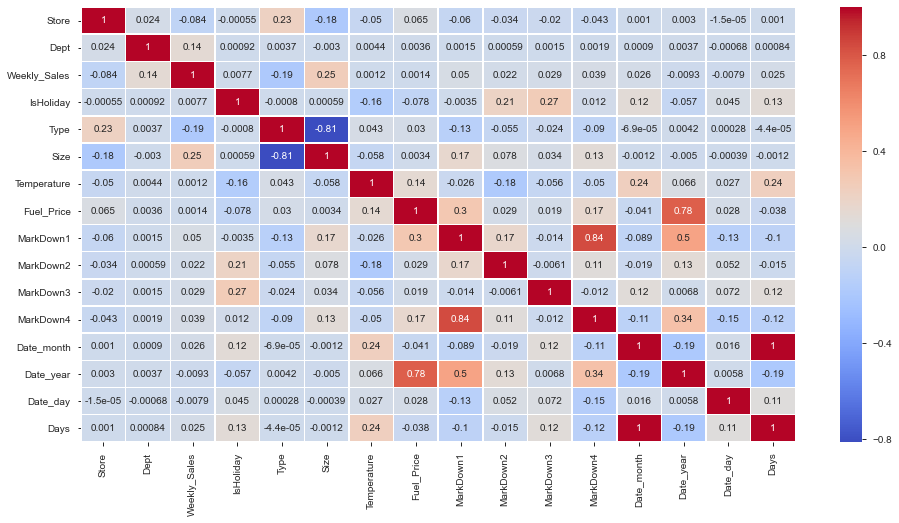

In [235]:
import seaborn as sns
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

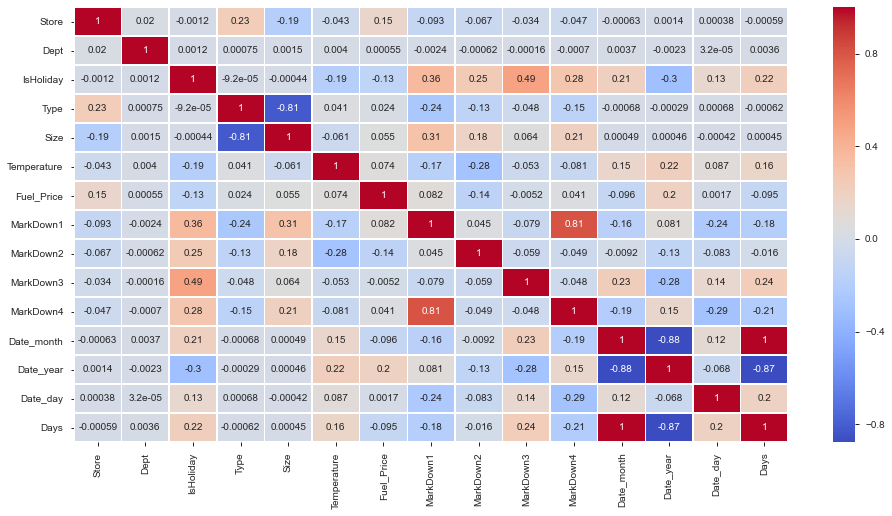

In [236]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(test.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

In [257]:
train = train.drop(['MarkDown1','Date_year','Date_month','Days'],axis=1)
                                       
test= test.drop(['MarkDown1','Date_year','Date_month','Days'],axis=1)

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 13 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null int32
IsHoliday       421570 non-null int64
Type            421570 non-null int64
Size            421570 non-null int64
Temperature     421570 non-null int32
Fuel_Price      421570 non-null int32
MarkDown2       421570 non-null int32
MarkDown3       421570 non-null int32
MarkDown4       421570 non-null int32
Date_day        421570 non-null int64
dtypes: datetime64[ns](1), int32(6), int64(6)
memory usage: 35.4 MB


In [259]:
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)


In [260]:
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)

In [261]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,Date_day
0,1,1,2010-02-05,24924,0,1,151315,42,2,0,0,0,5
1,1,1,2010-02-12,46039,1,1,151315,38,2,0,0,0,12


In [262]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,Date_day
0,1,1,2012-11-02,0,1,151315,55,3,5147,50,3639,2
1,1,1,2012-11-09,0,1,151315,61,3,3370,40,4646,9


### Define the train & test data

In [265]:
#### train X= Exery thing except Weekly_Sales and date
train_X=train.drop(['Date','Weekly_Sales'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 11), (421570,), (115064, 11))

### Model Building

In [150]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [271]:
# Step 1 and Step 2: define Y, X and build a ols model
lm1 = smf.ols('''Weekly_Sales ~  Store  + 
                    Dept + 
                        Type + Size + Temperature + MarkDown2 + MarkDown3 + MarkDown4 +Date_day  ''', train).fit()

In [272]:
# Step 3: get the output summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4516.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        08:19:11   Log-Likelihood:            -4.7637e+06
No. Observations:              421570   AIC:                         9.527e+06
Df Residuals:                  421560   BIC:                         9.528e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4158.8639    263.747    -15.768      

### Random Forest

In [273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [274]:
%timeit
param_grid={'n_estimators':np.arange(21,101)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=14)
tree.fit(train_X,train_y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 60.0min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 60.6min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 66.0min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 68.3min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 70.2min
[Paralle

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             param_grid={'n_estimators': array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        

In [275]:
tree.best_params_

{'n_estimators': 87}

In [276]:
clf_rf = RandomForestRegressor(n_estimators=87, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 87building tree 2 of 87building tree 3 of 87
building tree 4 of 87


building tree 5 of 87
building tree 6 of 87building tree 7 of 87

building tree 8 of 87
building tree 9 of 87
building tree 10 of 87
building tree 11 of 87building tree 12 of 87

building tree 13 of 87
building tree 14 of 87
building tree 15 of 87
building tree 16 of 87


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.4s


building tree 17 of 87
building tree 18 of 87
building tree 19 of 87
building tree 20 of 87
building tree 21 of 87
building tree 22 of 87
building tree 23 of 87
building tree 24 of 87
building tree 25 of 87
building tree 26 of 87
building tree 27 of 87
building tree 28 of 87
building tree 29 of 87
building tree 30 of 87
building tree 31 of 87
building tree 32 of 87
building tree 33 of 87
building tree 34 of 87
building tree 35 of 87
building tree 36 of 87
building tree 37 of 87
building tree 38 of 87
building tree 39 of 87
building tree 40 of 87
building tree 41 of 87
building tree 42 of 87
building tree 43 of 87
building tree 44 of 87
building tree 45 of 87
building tree 46 of 87
building tree 47 of 87
building tree 48 of 87
building tree 49 of 87
building tree 50 of 87
building tree 51 of 87
building tree 52 of 87
building tree 53 of 87
building tree 54 of 87
building tree 55 of 87
building tree 56 of 87
building tree 57 of 87
building tree 58 of 87
building tree 59 of 87
building tr

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min


building tree 69 of 87
building tree 70 of 87
building tree 71 of 87
building tree 72 of 87
building tree 73 of 87
building tree 74 of 87
building tree 75 of 87
building tree 76 of 87
building tree 77 of 87
building tree 78 of 87
building tree 79 of 87
building tree 80 of 87
building tree 81 of 87
building tree 82 of 87
building tree 83 of 87
building tree 84 of 87
building tree 85 of 87
building tree 86 of 87
building tree 87 of 87


[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  87 out of  87 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  87 out of  87 | elapsed:    3.0s finished


Accuracy of Random Forest model: 99.4%


In [280]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,23033.413793
1,1_1_2012-11-09,28192.218391
2,1_1_2012-11-16,30134.574713
3,1_1_2012-11-23,22656.160920
4,1_1_2012-11-30,50492.333333
